In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
ds = pd.read_csv('Social_Network_Ads.csv')

In [4]:
ds.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [5]:
ds.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
ds.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
ds.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [11]:
ds.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [14]:
ds.replace('Male',0,inplace=True)
ds.replace('Female',1,inplace=True)

In [16]:
ds.dtypes

User ID            int64
Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [17]:
correlation_matrix = ds.corr()

In [18]:
correlation_matrix

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,1.000000,0.025249,-0.000721,0.071097,0.007120
Gender,0.025249,1.000000,0.073741,0.060435,0.042469
Age,-0.000721,0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.060435,0.155238,1.000000,0.362083
Purchased,0.007120,0.042469,0.622454,0.362083,1.000000


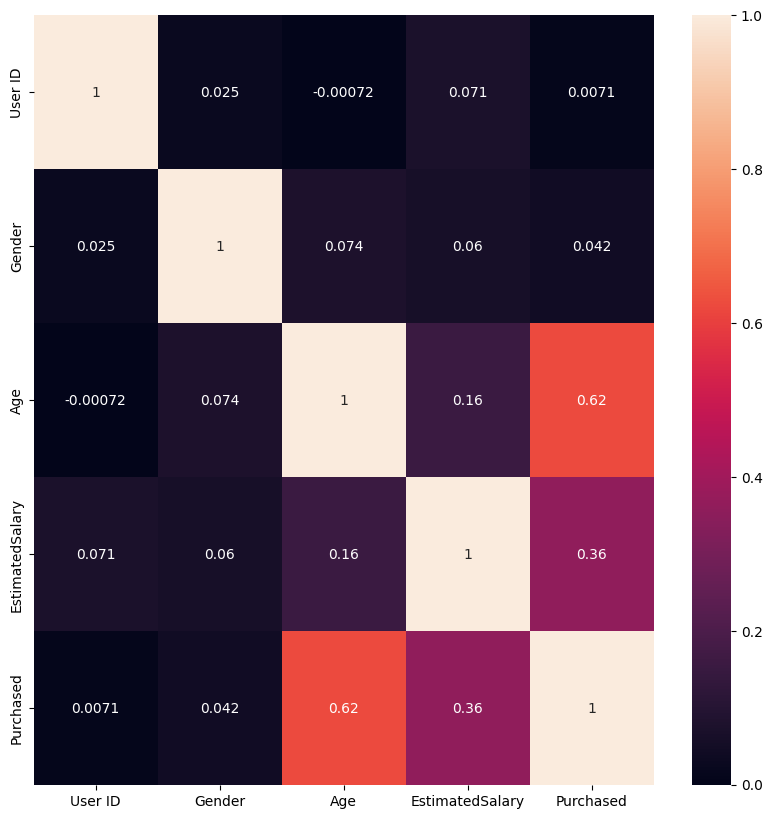

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix,annot=True)
plt.show()

In [25]:
ds

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [27]:
# drop the User ID as it is unique
ds.drop(columns = 'User ID',inplace = True)

In [28]:
ds

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x = ds.drop('Purchased',axis = 1)

In [31]:
y = ds['Purchased']

In [32]:
x.shape , y.shape

((400, 3), (400,))

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42,shuffle=True)

In [36]:
x_train.shape, x_test.shape , y_train.shape, y_test.shape

((280, 3), (120, 3), (280,), (120,))

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [38]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [43]:
print(np.array(y_test))

[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0
 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0
 0 1 1 1 0 0 1 0 0]


In [56]:
# y_pred = 0 positive
# y_pred = 1 negative

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.8583333333333333


In [74]:
tp = ((y_pred == 0) & (y_test == 0)).sum()
fp = ((y_pred == 0) & (y_test == 1)).sum()
fn = ((y_pred == 1) & (y_test == 0)).sum()
tn = ((y_pred == 1) & (y_test == 1)).sum()


print("|Confusion Matrix|")
print(f"|    {tp} {fp}       |")
print(f"|    {fn}  {tn}       |")

|Confusion Matrix|
|    71 15       |
|    2  32       |


In [75]:
# Now we will calculate accuracy, precision and recall 
# f1 is just the harmonic mean of precision and recall
# error is 1 - accuracy
precision = tp / (tp + fp) # correct positives out of total
accuracy = (tp + tn)/ (tp + tn + fp + fn) # correct/total
error = 1 - accuracy
recall = tp / (tp + fn)
f1 = (2 * precision * recall) / (precision + recall)

print( "Recall:" , recall ) 
print( "Precision:" , precision ) 
print( "Accuracy:" , accuracy ) 
print( "Error rate:" , error ) 
print( "F1:" , f1 )

Recall: 0.9726027397260274
Precision: 0.8255813953488372
Accuracy: 0.8583333333333333
Error rate: 0.14166666666666672
F1: 0.8930817610062893
